# 📚 Student Setup Instructions

## 🎯 What This Notebook Does
This notebook teaches you how to build an AI agent using **LangGraph** with **100% local models** (no API keys required). The agent can use tools to perform calculations.

---

## ⚙️ Prerequisites & Setup (DO THIS FIRST!)

### Step 1: Install Ollama

**Windows:**
```powershell
winget install Ollama.Ollama
```

**Mac:**
```bash
brew install ollama
```

**Linux:**
```bash
curl -fsSL https://ollama.ai/install.sh | sh
```

### Step 2: Start Ollama Service

**After installation, restart your terminal/VS Code**, then:

**Windows (PowerShell):**
```powershell
Start-Process "$env:LOCALAPPDATA\Programs\Ollama\ollama.exe" -ArgumentList "serve" -WindowStyle Hidden
```

**Mac/Linux:**
```bash
ollama serve &
```

### Step 3: Download the AI Model

In a **new terminal**, run:
```bash
ollama pull llama3.2:1b
```

⏱️ **Wait for download to complete** (~1.3GB, takes 5-15 minutes depending on your internet speed)

You should see: `success` when complete.

### Step 4: Install Python Dependencies

Make sure you have these packages installed:

```bash
pip install langgraph langchain-ollama langchain-core langchain-community typing-extensions
```

### Step 5: Verify Setup

Run cell 2 below to verify everything is ready!

---

## ✅ Once Setup is Complete:

1. **Select your Python environment** (kernel) in VS Code
2. **Run all cells** sequentially (or use "Run All")
3. **Observe** how the agent uses tools to solve math problems

---

## 🆘 Troubleshooting

### "Model not found" error?
- Make sure `ollama pull llama3.2:1b` completed successfully
- Check with: `ollama list` (you should see llama3.2:1b in the list)

### "Connection refused" error?
- Ollama service isn't running
- Restart it with the command in Step 2

### Import errors?
- Install missing packages: `pip install <package-name>`
- Make sure you selected the correct Python environment

---

## ✅ Ready to Learn!

If the verification cell above shows **SUCCESS**, you're ready to go!

### What You'll Learn:
1. How to define AI tools (functions the AI can use)
2. How to create a state machine for your agent
3. How to build an agent that makes decisions
4. How to use LangGraph to orchestrate everything

### Tips for Students:
- 📖 **Read the markdown cells** - they explain what each step does
- 🏃 **Run cells sequentially** - each cell builds on the previous one
- ? **Examine the output** - see how the agent thinks and acts
- 🧪 **Experiment** - try changing the test questions in the final cells!

---

In [ ]:
# ========================================
# VERIFICATION CELL - Run this first!
# ========================================
# This cell checks if Ollama and the model are properly set up

import subprocess
import os

print("🔍 Checking setup...\n")

try:
    # Try to find Ollama
    if os.name == 'nt':  # Windows
        ollama_path = os.path.expandvars(r"$env:LOCALAPPDATA\Programs\Ollama\ollama.exe")
        if not os.path.exists(ollama_path):
            ollama_path = "ollama"
    else:  # Mac/Linux
        ollama_path = "ollama"
    
    # Check available models
    result = subprocess.run(
        [ollama_path, "list"],
        capture_output=True,
        text=True,
        timeout=5
    )
    
    print("📋 Available Ollama models:")
    print("-" * 50)
    print(result.stdout)
    
    # Check if our model is available
    if "llama3.2:1b" in result.stdout or "llama3.2" in result.stdout:
        print("\n" + "="*50)
        print("✅ SUCCESS! Setup is complete!")
        print("="*50)
        print("\n🎉 You can now run all cells in this notebook.")
        print("💡 Tip: Use 'Run All' or execute cells one by one with Shift+Enter\n")
    else:
        print("\n" + "="*50)
        print("❌ Model NOT found!")
        print("="*50)
        print("\n⚠️  The Llama 3.2 1B model is not installed.")
        print("\n📥 To install, run this in a terminal:")
        print("   ollama pull llama3.2:1b")
        print("\n⏱️  Wait for 'success' message, then re-run this cell.\n")
        
except FileNotFoundError:
    print("❌ Ollama not found!")
    print("\n📥 Please install Ollama first:")
    print("   Windows: winget install Ollama.Ollama")
    print("   Mac:     brew install ollama")
    print("   Linux:   curl -fsSL https://ollama.ai/install.sh | sh")
    print("\n🔄 Then restart VS Code and run this cell again.\n")
    
except subprocess.TimeoutExpired:
    print("⚠️  Ollama service is not responding.")
    print("\n🚀 Start the Ollama service:")
    print("   Windows: Start-Process \"$env:LOCALAPPDATA\\Programs\\Ollama\\ollama.exe\" -ArgumentList \"serve\" -WindowStyle Hidden")
    print("   Mac/Linux: ollama serve &")
    print("\n🔄 Then re-run this cell.\n")
    
except Exception as e:
    print(f"⚠️  Unexpected error: {e}")
    print("\n💡 Try these steps:")
    print("   1. Make sure Ollama is installed")
    print("   2. Start the Ollama service")
    print("   3. Run: ollama pull llama3.2:1b")
    print("   4. Re-run this cell\n")

❌ Ollama not found. Please check the installation.


# LangGraph Quickstart - Local Models Edition

This notebook replicates the official LangGraph quickstart tutorial using **local models via Ollama**.

## Model Being Used
- **Llama 3.2 1B** via Ollama (fast, lightweight, supports tool calling)

## Prerequisites
- ✅ Ollama installed and running
- ✅ Llama 3.2 1B model downloaded
- ✅ LangGraph and dependencies installed

## What This Tutorial Covers
1. Define tools and model (using Ollama instead of Anthropic)
2. Define state for the agent
3. Define model node
4. Define tool node
5. Define routing logic
6. Build and compile the agent
7. Run the agent

## Step 1: Define Tools and Model

We'll use **Llama 3.2 1B via Ollama** (local model with tool calling support) instead of Claude.

In [14]:
from langchain.tools import tool
from langchain_ollama import ChatOllama

# Use local Llama 3.2 1B model via Ollama (smaller, faster)
model = ChatOllama(
    model="llama3.2:1b",  # Local model with tool calling support
    temperature=0
)

print("✅ Model loaded: Llama 3.2 1B (local via Ollama)")

✅ Model loaded: Llama 3.2 1B (local via Ollama)


In [ ]:
# ========================================
# DEFINE TOOLS
# ========================================
# Tools are Python functions that the AI can call.
# The @tool decorator makes them available to the LLM.

@tool
def multiply(a: int, b: int) -> int:
    """Multiply `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a * b


@tool
def add(a: int, b: int) -> int:
    """Adds `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a + b


@tool
def divide(a: int, b: int) -> float:
    """Divide `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a / b


# ========================================
# BIND TOOLS TO MODEL
# ========================================
# This tells the model which tools are available.
# The model can now decide when to use these tools.

tools = [add, multiply, divide]
tools_by_name = {tool.name: tool for tool in tools}
model_with_tools = model.bind_tools(tools)

print(f"✅ Tools defined: {', '.join([t.name for t in tools])}")
print(f"📝 The AI can now use these {len(tools)} tools to solve problems!")

✅ Tools defined: add, multiply, divide


## Step 2: Define State

The graph's state stores messages and tracks the number of LLM calls.

In [ ]:
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
import operator

# ========================================
# STATE DEFINITION
# ========================================
# State stores all information as the agent runs.
# Think of it like the agent's "memory" during execution.

class MessagesState(TypedDict):
    # messages: The conversation history (user messages, AI responses, tool results)
    # operator.add means new messages are APPENDED, not replaced
    messages: Annotated[list[AnyMessage], operator.add]
    
    # llm_calls: Counts how many times we called the LLM (for debugging/monitoring)
    llm_calls: int

print("✅ State defined")
print("📝 State will track: conversation messages + LLM call count")

✅ State defined


## Step 3: Define Model Node

The model node calls the LLM and decides whether to use a tool.

In [ ]:
from langchain_core.messages import SystemMessage

# ========================================
# MODEL NODE (The "Brain")
# ========================================
# This node calls the LLM to decide what to do.
# The LLM can either:
#   1. Call a tool (if it needs to perform an action)
#   2. Respond directly (if it has enough information)

def llm_call(state: dict):
    """LLM decides whether to call a tool or not"""
    
    # Add system message to give the AI its role/instructions
    system_msg = SystemMessage(
        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."
    )
    
    # Call the model with system message + conversation history
    response = model_with_tools.invoke([system_msg] + state["messages"])
    
    return {
        "messages": [response],  # Add AI response to conversation
        "llm_calls": state.get('llm_calls', 0) + 1  # Increment counter
    }

print("✅ Model node defined")
print("📝 This node lets the AI analyze the request and decide actions")

✅ Model node defined


## Step 4: Define Tool Node

The tool node executes the tools and returns results.

In [ ]:
from langchain_core.messages import ToolMessage

# ========================================
# TOOL NODE (The "Hands")
# ========================================
# This node executes the tools that the LLM requested.
# It takes the tool calls from the AI and actually runs them.

def tool_node(state: dict):
    """Performs the tool call"""
    
    result = []
    last_message = state["messages"][-1]  # Get the last AI message
    
    # Loop through each tool call the AI requested
    for tool_call in last_message.tool_calls:
        tool = tools_by_name[tool_call["name"]]  # Get the actual tool function
        observation = tool.invoke(tool_call["args"])  # Execute the tool
        
        # Create a message with the tool result
        result.append(ToolMessage(
            content=str(observation), 
            tool_call_id=tool_call["id"]
        ))
    
    return {"messages": result}

print("✅ Tool node defined")
print("📝 This node executes the actual calculations when the AI requests them")

✅ Tool node defined


## Step 5: Define Routing Logic

The conditional edge decides whether to continue to tools or end.

In [ ]:
from typing import Literal
from langgraph.graph import StateGraph, START, END

# ========================================
# ROUTING LOGIC (The "Decision Maker")
# ========================================
# This function decides the next step in the workflow.
# It's like a traffic controller directing the flow.

def should_continue(state: MessagesState) -> Literal["tool_node", END]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""
    
    messages = state["messages"]
    last_message = messages[-1]
    
    # Check if the AI wants to use a tool
    if last_message.tool_calls:
        # If yes -> go to tool_node to execute the tool
        return "tool_node"
    
    # If no tool calls -> we're done! The AI has the final answer
    return END

print("✅ Routing logic defined")
print("📝 This decides: Should we use a tool? Or are we done?")

✅ Routing logic defined


## Step 6: Build and Compile the Agent

Now we assemble everything into a LangGraph agent.

In [ ]:
# ========================================
# BUILD THE AGENT (Putting It All Together)
# ========================================
# This is where we create the workflow graph!

# 1. Create a graph builder with our state type
agent_builder = StateGraph(MessagesState)

# 2. Add nodes (the things that do work)
agent_builder.add_node("llm_call", llm_call)    # Node: Call the AI
agent_builder.add_node("tool_node", tool_node)  # Node: Execute tools

# 3. Add edges (the connections between nodes)
agent_builder.add_edge(START, "llm_call")  # Start -> Always go to llm_call first

# 4. Add conditional edge (decision point)
agent_builder.add_conditional_edges(
    "llm_call",           # From: llm_call node
    should_continue,      # Use this function to decide
    ["tool_node", END]    # Possible destinations
)

agent_builder.add_edge("tool_node", "llm_call")  # After using a tool, go back to AI

# 5. Compile the graph into an executable agent
agent = agent_builder.compile()

print("✅ Agent compiled successfully!")
print("📝 Flow: START → llm_call → [tool_node → llm_call] → END")
print("💡 The agent will loop between AI and tools until done!")

✅ Agent compiled successfully!


### Visualize the Agent Graph

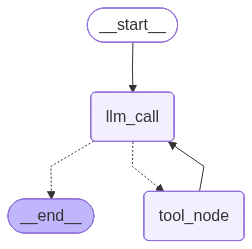

In [21]:
# Show the agent graph
try:
    from IPython.display import Image, display
    display(Image(agent.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")
    print("\nAgent structure:")
    print("START -> llm_call -> [tool_node OR END]")
    print("tool_node -> llm_call (loops back)")

## Step 7: Test the Agent

Let's run some arithmetic tasks and see how the agent works!

### 🔍 What to Observe:
- **User message**: The question we ask
- **AI message**: The AI's response (may include tool calls)
- **Tool messages**: Results from executing tools
- **Final AI message**: The AI's final answer to the user

### 💡 Understanding the Flow:
1. User asks a question
2. AI decides if it needs to use a tool
3. If yes: Tool executes → Result sent back to AI → AI formulates answer
4. If no: AI responds directly

---

### Test 1: Simple Addition

In [22]:
from langchain_core.messages import HumanMessage

# Test 1: Simple addition
print("=" * 60)
print("TEST 1: Add 3 and 4")
print("=" * 60)

messages = [HumanMessage(content="Add 3 and 4.")]
result = agent.invoke({"messages": messages})

for m in result["messages"]:
    m.pretty_print()

print(f"\n📊 Total LLM calls: {result.get('llm_calls', 0)}")

TEST 1: Add 3 and 4
================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (530877bf-0f21-4ab3-b8f3-625c79fc65d7)
 Call ID: 530877bf-0f21-4ab3-b8f3-625c79fc65d7
  Args:
    a: 3
    b: 4
================================= Tool Message =================================

7
================================== Ai Message ==================================

The result of adding 3 and 4 is 7.

📊 Total LLM calls: 2
================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (530877bf-0f21-4ab3-b8f3-625c79fc65d7)
 Call ID: 530877bf-0f21-4ab3-b8f3-625c79fc65d7
  Args:
    a: 3
    b: 4
================================= Tool Message =================================

7
================================== Ai Message ===============

### Test 2: Multiplication

In [24]:
# Test 2: Multiplication
print("=" * 60)
print("TEST 2: Multiply 7 by 8")
print("=" * 60)

messages = [HumanMessage(content="What is 7 times 8?")]
result = agent.invoke({"messages": messages})

for m in result["messages"]:
    m.pretty_print()

print(f"\n📊 Total LLM calls: {result.get('llm_calls', 0)}")

TEST 2: Multiply 7 by 8
================================ Human Message =================================

What is 7 times 8?
================================== Ai Message ==================================
Tool Calls:
  multiply (aae128d9-6a3a-433a-bd78-f64c12f303bb)
 Call ID: aae128d9-6a3a-433a-bd78-f64c12f303bb
  Args:
    a: 7
    b: 8
================================= Tool Message =================================

56
================================== Ai Message ==================================

The result of multiplying 7 and 8 is 56.

📊 Total LLM calls: 2
================================ Human Message =================================

What is 7 times 8?
================================== Ai Message ==================================
Tool Calls:
  multiply (aae128d9-6a3a-433a-bd78-f64c12f303bb)
 Call ID: aae128d9-6a3a-433a-bd78-f64c12f303bb
  Args:
    a: 7
    b: 8
================================= Tool Message =================================

56
===========================

### Test 3: Multi-Step Calculation

This test requires the agent to use tools multiple times!

In [25]:
# Test 3: Complex multi-step calculation
print("=" * 60)
print("TEST 3: Complex calculation")
print("=" * 60)

messages = [HumanMessage(content="Add 5 and 3, then multiply the result by 2.")]
result = agent.invoke({"messages": messages})

for m in result["messages"]:
    m.pretty_print()

print(f"\n📊 Total LLM calls: {result.get('llm_calls', 0)}")

TEST 3: Complex calculation
================================ Human Message =================================

Add 5 and 3, then multiply the result by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (dabb16ab-a94c-4185-9ae1-09b39242432e)
 Call ID: dabb16ab-a94c-4185-9ae1-09b39242432e
  Args:
    a: 5
    b: 3
================================= Tool Message =================================

15
================================== Ai Message ==================================

The final answer is $\boxed{15}$.

📊 Total LLM calls: 2
================================ Human Message =================================

Add 5 and 3, then multiply the result by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (dabb16ab-a94c-4185-9ae1-09b39242432e)
 Call ID: dabb16ab-a94c-4185-9ae1-09b39242432e
  Args:
    a: 5
    b: 3
================================= Tool Message ==================

### Test 4: Division

In [26]:
# Test 4: Division
print("=" * 60)
print("TEST 4: Divide 100 by 4")
print("=" * 60)

messages = [HumanMessage(content="Divide 100 by 4.")]
result = agent.invoke({"messages": messages})

for m in result["messages"]:
    m.pretty_print()

print(f"\n📊 Total LLM calls: {result.get('llm_calls', 0)}")

TEST 4: Divide 100 by 4
================================ Human Message =================================

Divide 100 by 4.
================================== Ai Message ==================================
Tool Calls:
  divide (9ae5e029-2c2b-4e4a-9b53-e705d1cee9da)
 Call ID: 9ae5e029-2c2b-4e4a-9b53-e705d1cee9da
  Args:
    a: 100
    b: 4
================================= Tool Message =================================

25.0
================================== Ai Message ==================================

The result of dividing 100 by 4 is 25.0.

📊 Total LLM calls: 2
================================ Human Message =================================

Divide 100 by 4.
================================== Ai Message ==================================
Tool Calls:
  divide (9ae5e029-2c2b-4e4a-9b53-e705d1cee9da)
 Call ID: 9ae5e029-2c2b-4e4a-9b53-e705d1cee9da
  Args:
    a: 100
    b: 4
================================= Tool Message =================================

25.0
===========================

## 🎉 Congratulations!

You've successfully replicated the LangGraph quickstart tutorial using a **local model (Llama 3.2 1B via Ollama)**!

### Key Differences from Original Tutorial:
- ✅ **Local Model**: Using `llama3.2:1b` instead of `anthropic:claude-sonnet-4-5`
- ✅ **No API Keys**: Everything runs locally on your machine
- ✅ **Same Functionality**: Tool calling, state management, and routing work the same way
- ✅ **Fast & Lightweight**: 1B model is quick to download and run

### Other Compatible Local Models:
- `llama3.2:3b` (better performance, slower download - 2GB)
- `llama3.1:8b` (even better, larger - 4.7GB)
- `mistral` (7B, good tool calling - 4.1GB)
- `qwen2.5:7b` (Qwen 7B+ supports tools - 4.7GB)

### To Switch Models:
Just change the model name in cell 5:
```python
model = ChatOllama(model="llama3.2:3b", temperature=0)
```

Then run: `ollama pull <model-name>` in terminal first.

### Next Steps:
- Experiment with different models
- Add more complex tools
- Build multi-agent systems
- Explore LangGraph's advanced features

---

## 🎓 Exercises for Students

Now that you understand how this works, try these challenges:

### Exercise 1: Add a New Tool
Create a new tool called `power` that raises `a` to the power of `b`.
- Add the `@tool` decorator
- Include it in the `tools` list
- Test it with: "What is 2 to the power of 8?"

### Exercise 2: Modify the System Message
Change the system message in the `llm_call` function to make the agent respond in a different style (e.g., "like a pirate" or "very formally").

### Exercise 3: Track More State
Add a new field to `MessagesState` to track the number of tools used. Update `tool_node` to increment this counter.

### Exercise 4: Create Your Own Agent
Think of a different domain (e.g., string manipulation, data analysis) and create tools for it. Build a new agent using the same pattern!

### Exercise 5: Handle Edge Cases
What happens if you try to divide by zero? Modify the `divide` tool to handle this error gracefully.

---

## 📚 Additional Resources

- **LangGraph Documentation**: https://docs.langchain.com/oss/python/langgraph/
- **LangChain Tools**: https://python.langchain.com/docs/modules/tools/
- **Ollama Models**: https://ollama.ai/library

---